In [361]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [362]:
# using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
import random

# data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# linear regression
from sklearn.linear_model import LinearRegression

# classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor

# clustering
from sklearn.cluster import KMeans

# data split, validation, parameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

# evaluationi
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score

# warning
import warnings 
warnings.filterwarnings(action='ignore')

In [364]:
#Data Curation

#List of 32 countries qualifying for Qatar World Cup 2022
country_list = ['Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'United States', 'Wales','Argentina', 
                'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Denmark', 'Tunisia', 'Peru', 'Spain',
                'Germany', 'Japan', 'Costa Rica', 'Belgium', 'Canada','Morocco', 'Croatia', 'Brazil', 
                'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay','South Korea', 'Qatar']

In [365]:
# read the dataset of international football matches played between countries around the world from 1872 to 2022
# https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017
results = pd.read_csv('/content/drive/MyDrive/2022-1/데이터과학/Term Project/Winner/results.csv', encoding='unicode_escape')
results['date'] = pd.to_datetime(results['date']) # change object to datetime
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


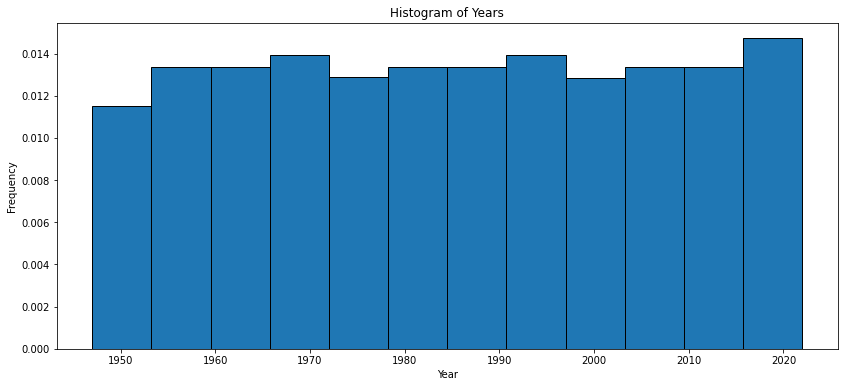

In [366]:
# read the dataset of FIFA's official rankings by year
# https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
rankings = pd.read_csv('/content/drive/MyDrive/2022-1/데이터과학/Term Project/Winner/rankings.csv', encoding='unicode_escape')
rankings['rank_date'] = pd.to_datetime(rankings['rank_date']) # change object to datetime

# check the year distribution of the ranking data
years = []
for date in rankings.rank_date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(14, 6))
plt.hist(years, density=True, bins=12, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

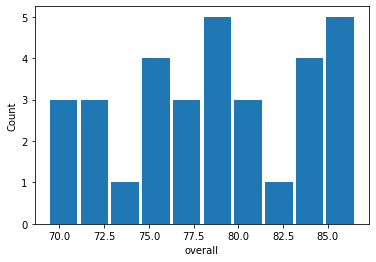

count    32.000000
mean     78.639410
std       5.205907
min      69.377778
25%      75.344444
50%      79.255556
75%      83.833333
max      86.555556
Name: overall, dtype: float64

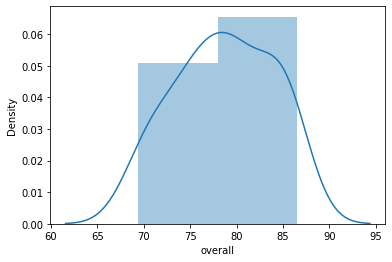

In [367]:
# read the dataset containing various information about soccer players
# https://www.kaggle.com/datasets/stefanoleone992/fifa-21-complete-player-dataset
overall = pd.read_csv('/content/drive/MyDrive/2022-1/데이터과학/Term Project/Winner/overall.csv', encoding='unicode_escape')

#Checking the distribution of the overall
plt.hist(overall['overall'],rwidth=0.9)
plt.xlabel('overall')
plt.ylabel('Count')
plt.show()

sns.distplot(overall['overall'])
overall['overall'].describe()

In [368]:
# read the dataset of countries and opponents in 2022 FIFA World Cup Qatar
# datasets were created by ourselves
world_cup = pd.read_csv('/content/drive/MyDrive/2022-1/데이터과학/Term Project/Winner/World Cup 2022 Dataset.csv')
world_cup.head()

,Team,Group,First match \nagainst,Second match\n against,Third match\n against
0,Qatar,A,Ecuador,Senegal,Netherlands
1,Ecuador,A,Qatar,Netherlands,Senegal
2,Senegal,A,Netherlands,Qatar,Ecuador
3,Netherlands,A,Senegal,Ecuador,Qatar
4,England,B,IR Iran,USA,Wales


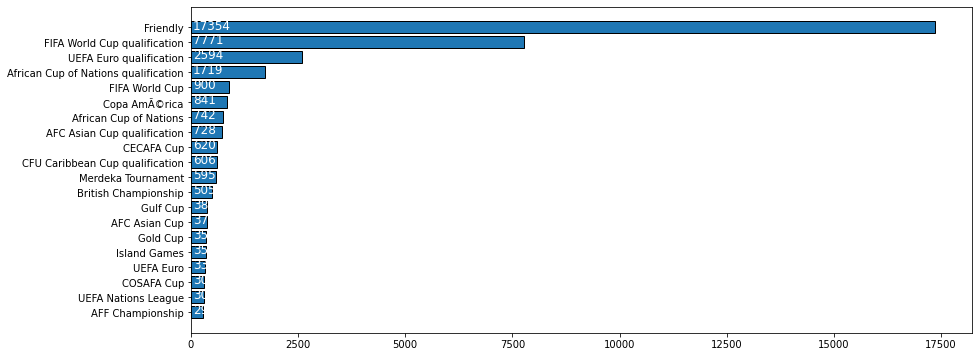

In [369]:
# Data Inspection - data exploration

# friendly matches are the most common
# all players would play their best even in friendly matches
rank_bound = 20
match_sort = results.tournament.value_counts()[:rank_bound].sort_values()
value = match_sort.values
label = match_sort.index

# show with a barplot
plt.figure(figsize=(14, 6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50, y=i - 0.1, s=value[i], color="w", fontsize=12)

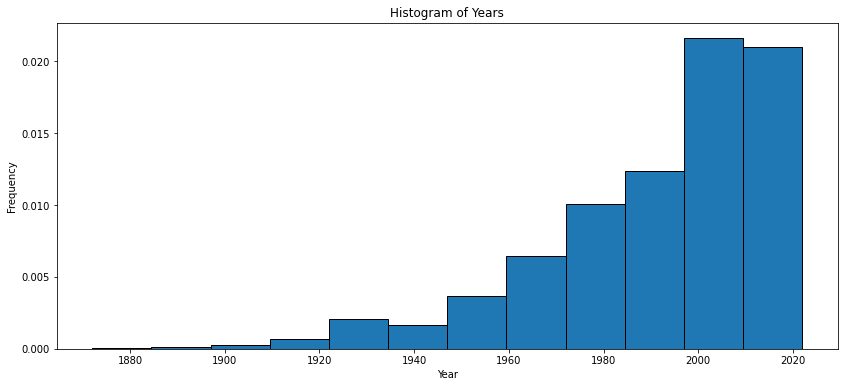

In [370]:
# more recent matches, the more data
years = []

for date in results.date:
    years.append(int(str(date)[0:4]))

# show with a histogram
plt.figure(figsize=(14, 6))
plt.hist(years, density=True, bins=12, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

Text(0.5, 1.0, 'Home Team Winning Status')

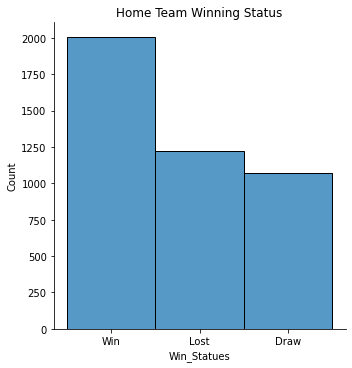

In [371]:
# winnig rate was much better when you were on the home team than away

home_team_ws = results.copy()

# only 32 countries that advanced to the Qatar World Cup finals are extracted
home_team_ws = home_team_ws[home_team_ws['home_team'].isin(country_list)]
home_team_ws = home_team_ws[home_team_ws['away_team'].isin(country_list)]

# categorize by conditions as wins, draws, and losses
conditions = [home_team_ws["home_score"] == home_team_ws["away_score"], home_team_ws["home_score"] > home_team_ws["away_score"],
              home_team_ws["home_score"] < home_team_ws["away_score"]]
choices = ["Draw", 'Win', 'Lost']
home_team_ws["Win_Statues"] = np.select(conditions, choices)

# show with a displot
sns.displot(home_team_ws, x="Win_Statues")
plt.title("Home Team Winning Status")

In [372]:
# sort the winning percentages of each team in ascending order
# function that returns winning percentage when playing on home teams from 32 countries playing in Qatar World Cup
def win_prob(team,result):
    
    win_statues = results.copy()
    
    # only 32 countries that advanced to the Qatar World Cup finals are extracted
    win_statues = win_statues[win_statues['home_team'].isin(country_list)]
    win_statues = win_statues[win_statues['away_team'].isin(country_list)]

    # categorize by conditions as wins, drawin_statues, and losses
    conditions = [win_statues["home_score"] == win_statues["away_score"], win_statues["home_score"] > win_statues["away_score"],
              win_statues["home_score"] < win_statues["away_score"]]
    choices = ["Draw", 'Win', 'Lost']
    win_statues["Win_Statues"] = np.select(conditions, choices)
    
    teams_win_statues = pd.crosstab(win_statues[team], win_statues["Win_Statues"], margins=True, margins_name="Total")
    teams_win_statues["team_win_probability"] = teams_win_statues[result] / (teams_win_statues["Total"])

    # select teams which plays at least 50 games
    teams_win_statues_50 = teams_win_statues.loc[teams_win_statues["Total"] > 50]
    teams_win_statues_50 = teams_win_statues_50.sort_values("team_win_probability", ascending=False)
    return teams_win_statues_50

teams_home_statues = win_prob("home_team","Win")
teams_home_statues.style.bar(color="orange", subset="team_win_probability")

Win_Statues,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Brazil,50,36,208,294,0.707483
Argentina,67,48,185,300,0.616667
Spain,34,26,95,155,0.612903
England,51,41,132,224,0.589286
Mexico,57,51,127,235,0.540426
Germany,57,49,118,224,0.526786
France,52,55,118,225,0.524444
Netherlands,54,47,107,208,0.514423
Uruguay,63,43,95,201,0.472637


In [373]:
# winnig rate of each team when the team is away
teams_away_statues = win_prob("away_team","Lost")
teams_away_statues.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)
teams_away_statues.head(10)

Win_Statues,Draw,Win,Win,Total,team_win_probability
away_team,,,,,
Germany,40,96,61,197,0.487310
England,63,106,57,226,0.469027
Brazil,61,107,74,242,0.442149
Spain,42,57,47,146,0.390411
France,39,61,73,173,0.352601
Netherlands,51,68,78,197,0.345178
Iran,20,22,24,66,0.333333
Argentina,76,87,101,264,0.329545
Poland,40,47,70,157,0.299363


In [374]:
# Data Preprocessing - data restructuring

# Wrong data
# names of countries, which are marked differently from the main dataset, are unified.

# result data
results =  results.replace({'Germany DR': 'Germany', "Korea Republic" : "South Korea", 'China': 'China PR'})

# ranking data
rankings = rankings.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea", "USA" : "United States"}) 

# overall data
overall = overall.replace({"Korea Republic" : "South Korea"})

# world_cup match data
world_cup = world_cup.replace({"USA": "United States", "Korea Republic" : "South Korea", "IR Iran": "Iran"})
world_cup = world_cup.set_index('Team') # set index to 'Team' column

In [375]:
# Data Preprocessing - data restructuring

# Ranking dataset
# create a column that gives a ranking weight score by country
# current_year_ranking_point(100%) + two_years_ago_ranking_point(30%) + threee_years_ago_ranking_point(20%)
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
rankings = rankings.drop(['cur_year_avg_weighted', 'two_year_ago_weighted', 'three_year_ago_weighted'], axis = 1) # drop columns

# create a new colum named "Win_Statues" to store the result(Win,Lost,Draw) of the home team
conditions = [results["home_score"] == results["away_score"], results["home_score"] > results["away_score"],
              results["home_score"] < results["away_score"]]
choices = ["Draw", 'Win', 'Lost']
results["won"] = np.select(conditions, choices)
results_match=results.copy()

# Ranking by country, by date
# if there is missing value, replace it with ffill
rankings = rankings.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

# add the ranking information of the home team to the main data set
results = results.merge(rankings,left_on=['date', 'home_team'],right_on=['rank_date', 'country_full'])
# add the ranking information of the away team to the main data set
results = results.merge(rankings, left_on=['date', 'away_team'], right_on=['rank_date', 'country_full'], suffixes=('_home', '_away'))

# Overall dataset
# add the overall information of the home team to the main data set
results = results.merge(overall,left_on='home_team',right_on='nationality', how = 'outer')
# add the overall information of the away team to the main data set
results = results.merge(overall,left_on='away_team',right_on='nationality',how = 'outer', suffixes=('_home', '_away'))

# Results dataset
# create new columns to represent the difference between the two countries
results['rank_difference'] = results['rank_home'] - results['rank_away']
results['average_rank'] = (results['rank_home'] + results['rank_away'])/2
results['point_difference'] = results['weighted_points_home'] - results['weighted_points_away']
results['score_difference'] = results['home_score'] - results['away_score']
results['overall_difference'] = results['overall_home']- results['overall_away']
results['is_won'] = results['score_difference'] > 0 

In [376]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,won,rank_date_home,rank_home,country_full_home,country_abrv_home,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,weighted_points_away,nationality_home,overall_home,nationality_away,overall_away,rank_difference,average_rank,point_difference,score_difference,overall_difference,is_won
0,1947-08-17,Hungary,Bulgaria,9,0,Balkan Cup,Budapest,Hungary,False,Win,1947-08-17,42.0,Hungary,HUN,0.00,1947-08-17,37.0,Bulgaria,BUL,0.00,NaN,NaN,NaN,NaN,5.0,39.5,0.00,9,NaN,True
1,1949-10-30,Hungary,Bulgaria,5,0,Friendly,Budapest,Hungary,False,Win,1949-10-30,65.0,Hungary,HUN,0.00,1949-10-30,11.0,Bulgaria,BUL,0.00,NaN,NaN,NaN,NaN,54.0,38.0,0.00,5,NaN,True
2,1957-06-23,Hungary,Bulgaria,4,1,FIFA World Cup qualification,Budapest,Hungary,False,Win,1957-06-23,54.0,Hungary,HUN,0.00,1957-06-23,35.0,Bulgaria,BUL,0.00,NaN,NaN,NaN,NaN,19.0,44.5,0.00,3,NaN,True
3,1971-09-25,Hungary,Bulgaria,2,0,UEFA Euro qualification,Budapest,Hungary,False,Win,1971-09-25,59.0,Hungary,HUN,363.01,1971-09-25,38.0,Bulgaria,BUL,605.18,NaN,NaN,NaN,NaN,21.0,48.5,-242.17,2,NaN,True
4,1974-03-31,Hungary,Bulgaria,3,1,Friendly,Zalaegerszeg,Hungary,False,Win,1974-03-31,57.0,Hungary,HUN,0.00,1974-03-31,13.0,Bulgaria,BUL,0.00,NaN,NaN,NaN,NaN,44.0,35.0,0.00,2,NaN,True


In [377]:
# since two data frames were outer joined, a lot of na was created
# fill na with zero
results['nationality_home'].fillna(0, inplace = True)
results['nationality_away'].fillna(0, inplace = True)
results['overall_home'].fillna(0, inplace = True)
results['overall_away'].fillna(0, inplace = True)
results['overall_difference'].fillna(0, inplace = True)

In [378]:
# Preprocessing - Data Value Changes - Cleaning dirty data - Missing data

print(results.isnull().sum())

# delete all rows with na
results = results.dropna(axis=0)

print(results.isnull().sum())

date                    0
home_team               0
away_team               0
home_score              0
away_score              0
tournament              0
city                    0
country                 0
neutral                 0
won                     0
rank_date_home          0
rank_home               0
country_full_home       0
country_abrv_home       0
weighted_points_home    0
rank_date_away          0
rank_away               0
country_full_away       0
country_abrv_away       0
weighted_points_away    0
nationality_home        0
overall_home            0
nationality_away        0
overall_away            0
rank_difference         0
average_rank            0
point_difference        0
score_difference        0
overall_difference      0
is_won                  0
dtype: int64
date                    0
home_team               0
away_team               0
home_score              0
away_score              0
tournament              0
city                    0
country                 0

In [379]:
# make a copy of the dataframe for future use
main = results.copy()

In [380]:
#Preprocessing - Data Value Changes - Cleaning dirty data - unusable data

# only 32 countries that advanced to the Qatar World Cup finals are extracted
results = results[results['home_team'].isin(country_list)]
results = results[results['away_team'].isin(country_list)]

# delete all duplicate or unnecessary features
results.drop(['city'],axis=1,inplace=True)
results.drop(['tournament'],axis=1,inplace=True)
results.drop(['neutral'],axis=1,inplace=True)
results.drop(['rank_date_home'],axis=1,inplace=True)
results.drop(['country_full_home'],axis=1,inplace=True)
results.drop(['country_abrv_home'],axis=1,inplace=True)
results.drop(['rank_date_away'],axis=1,inplace=True)
results.drop(['country_full_away'],axis=1,inplace=True)
results.drop(['country_abrv_away'],axis=1,inplace=True)
results.drop(['nationality_home'],axis=1,inplace=True)
results.drop(['nationality_away'],axis=1,inplace=True)
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3674 entries, 538 to 29688
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3674 non-null   datetime64[ns]
 1   home_team             3674 non-null   object        
 2   away_team             3674 non-null   object        
 3   home_score            3674 non-null   int64         
 4   away_score            3674 non-null   int64         
 5   country               3674 non-null   object        
 6   won                   3674 non-null   object        
 7   rank_home             3674 non-null   float64       
 8   weighted_points_home  3674 non-null   float64       
 9   rank_away             3674 non-null   float64       
 10  weighted_points_away  3674 non-null   float64       
 11  overall_home          3674 non-null   float64       
 12  overall_away          3674 non-null   float64       
 13  rank_difference

([<matplotlib.axis.XTick at 0x7f8434ee8b50>,
 [Text(0, 0, 'Home Score'), Text(0, 0, 'Away Score')])

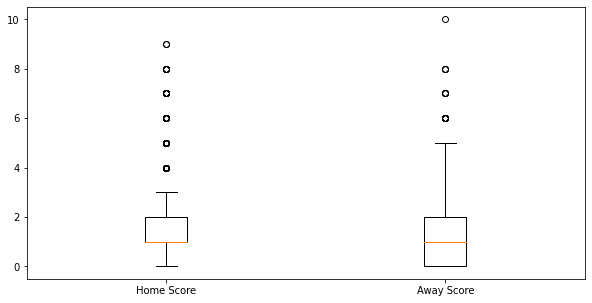

In [381]:
#Preprocessing - Data Value Changes - Cleaning dirty data - outliers

# find outliers in the numerical data columns
fig = plt.figure(figsize=(10, 5))
plt.boxplot([results["home_score"], results["away_score"]])
plt.xticks([1, 2], ["Home Score", "Away Score"])

([<matplotlib.axis.XTick at 0x7f8429851c50>,
 [Text(0, 0, 'Home Score'), Text(0, 0, 'Away Score')])

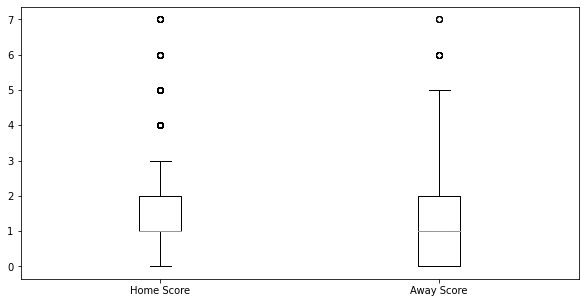

In [382]:
# Asume maximum goals that one team can score is 7
higher_home = 8
higher_away = 8
results = results[(results["home_score"] < higher_home) & (results["away_score"] < higher_away)]
score = results['home_score'] - results['away_score']

# show how the outlier has changed
fig = plt.figure(figsize=(10, 5))
plt.boxplot([results["home_score"], results["away_score"]])
plt.xticks([1, 2], ["Home Score", "Away Score"])

In [383]:
#Preprocessing - Data Value Changes - Data normalization

# StandardScaler
# standard scaling to match the range of numerical data similarly
X = results.copy()
scaler = StandardScaler()
X.loc[:,['overall_home','overall_away','home_score','away_score', 'weighted_points_home', 'rank_home', 'weighted_points_away', 
         'rank_away', 'rank_difference', 'average_rank','point_difference', 'score_difference', 'overall_difference']] = scaler.fit_transform(X.loc[:,['overall_home',
        'overall_away','home_score','away_score', 'weighted_points_home', 'rank_home', 'weighted_points_away', 
         'rank_away', 'rank_difference', 'average_rank','point_difference', 'score_difference', 'overall_difference']])
X.head()

,date,home_team,away_team,home_score,away_score,country,won,rank_home,weighted_points_home,rank_away,weighted_points_away,overall_home,overall_away,rank_difference,average_rank,point_difference,score_difference,overall_difference,is_won
538,1949-10-02,Belgium,Switzerland,1.110408,-0.977505,Belgium,Win,-0.257855,-0.603511,-0.691596,-0.606555,0.787142,-0.227228,0.343377,-0.639410,0.009694,1.470789,0.860098,True
539,1956-03-11,Belgium,Switzerland,-0.387038,1.637904,Belgium,Lost,-0.129477,-0.603511,1.601854,-0.606555,0.787142,-0.227228,-1.332208,1.007071,0.009694,-1.352966,0.860098,False
540,1960-03-27,Belgium,Switzerland,1.110408,-0.105702,Belgium,Win,1.068722,-0.603511,0.291311,-0.606555,0.787142,-0.227228,0.564681,0.895445,0.009694,0.906038,0.860098,True
541,1960-11-20,Belgium,Switzerland,0.361685,2.509706,Belgium,Lost,0.940344,-0.603511,-0.527778,-0.606555,0.787142,-0.227228,1.102133,0.253597,0.009694,-1.352966,0.860098,False
542,1966-10-22,Belgium,Switzerland,-0.387038,-0.977505,Belgium,Win,0.212866,0.771718,-0.527778,1.570803,0.787142,-0.227228,0.564681,-0.220813,-1.473299,0.341287,0.860098,True


In [384]:
#Preprocessing - Data Value Changes - Encoding

# function that receives a specific feature and performs an ordinal encoding
def OrdinalEncoding(X,columnName):
    ft = OrdinalEncoder()
    ft.fit(X[columnName][:, np.newaxis])
    X[columnName] = ft.transform(X[columnName][:, np.newaxis]).reshape(-1)

# encode team name
OrdinalEncoding(X,'home_team')
OrdinalEncoding(X,'away_team')

# encode the country name
OrdinalEncoding(X,'country')

# encode win state
OrdinalEncoding(X,'is_won')
OrdinalEncoding(X,'won')

X.head(5)

,date,home_team,away_team,home_score,away_score,country,won,rank_home,weighted_points_home,rank_away,weighted_points_away,overall_home,overall_away,rank_difference,average_rank,point_difference,score_difference,overall_difference,is_won
538,1949-10-02,1.0,27.0,1.110408,-0.977505,6.0,2.0,-0.257855,-0.603511,-0.691596,-0.606555,0.787142,-0.227228,0.343377,-0.639410,0.009694,1.470789,0.860098,1.0
539,1956-03-11,1.0,27.0,-0.387038,1.637904,6.0,1.0,-0.129477,-0.603511,1.601854,-0.606555,0.787142,-0.227228,-1.332208,1.007071,0.009694,-1.352966,0.860098,0.0
540,1960-03-27,1.0,27.0,1.110408,-0.105702,6.0,2.0,1.068722,-0.603511,0.291311,-0.606555,0.787142,-0.227228,0.564681,0.895445,0.009694,0.906038,0.860098,1.0
541,1960-11-20,1.0,27.0,0.361685,2.509706,6.0,1.0,0.940344,-0.603511,-0.527778,-0.606555,0.787142,-0.227228,1.102133,0.253597,0.009694,-1.352966,0.860098,0.0
542,1966-10-22,1.0,27.0,-0.387038,-0.977505,6.0,2.0,0.212866,0.771718,-0.527778,1.570803,0.787142,-0.227228,0.564681,-0.220813,-1.473299,0.341287,0.860098,1.0


,home_team,away_team,home_score,away_score,country,won,rank_home,weighted_points_home,rank_away,weighted_points_away,overall_home,overall_away,rank_difference,average_rank,point_difference,score_difference,overall_difference,is_won
home_team,1.000000,-0.105825,-0.129603,0.043496,0.732055,-0.091455,0.240504,-0.038041,0.051360,-0.009563,-0.377866,-0.061488,0.138034,0.191837,-0.052059,-0.125934,-0.268564,-0.115718
away_team,-0.105825,1.000000,0.066359,-0.059004,-0.131874,0.055983,0.051230,0.019502,0.177224,-0.003048,-0.034667,-0.265868,-0.098960,0.154170,0.041295,0.088276,0.195548,0.082670
home_score,-0.129603,0.066359,1.000000,-0.011678,-0.088758,0.527968,-0.182175,0.011623,0.080888,-0.036689,0.217946,-0.103914,-0.197029,-0.063684,0.088677,0.761851,0.272837,0.632979
away_score,0.043496,-0.059004,-0.011678,1.000000,0.039293,-0.219556,0.104561,-0.050211,-0.139939,0.005036,-0.107518,0.203270,0.185274,-0.027167,-0.101157,-0.656605,-0.263215,-0.464461
country,0.732055,-0.131874,-0.088758,0.039293,1.000000,-0.053170,0.175197,-0.008428,0.060649,0.009309,-0.320546,-0.073788,0.082615,0.155578,-0.032530,-0.092403,-0.209524,-0.077515
won,-0.091455,0.055983,0.527968,-0.219556,-0.053170,1.000000,-0.098924,0.005476,0.065585,-0.035621,0.132181,-0.110101,-0.123712,-0.019822,0.075466,0.540466,0.205306,0.895134
rank_home,0.240504,0.051230,-0.182175,0.104561,0.175197,-0.098924,1.000000,-0.168953,0.124244,-0.018189,-0.688498,-0.190894,0.642878,0.736790,-0.275830,-0.205146,-0.422617,-0.163436
weighted_points_home,-0.038041,0.019502,0.011623,-0.050211,-0.008428,0.005476,-0.168953,1.000000,-0.059794,0.851317,0.140155,0.022729,-0.078662,-0.150923,0.266360,0.041293,0.099679,0.029507
rank_away,0.051360,0.177224,0.080888,-0.139939,0.060649,0.065585,0.124244,-0.059794,1.000000,-0.212733,-0.202265,-0.670278,-0.680160,0.762425,0.281382,0.151664,0.395540,0.112842
weighted_points_away,-0.009563,-0.003048,-0.036689,0.005036,0.009309,-0.035621,-0.018189,0.851317,-0.212733,1.000000,0.033466,0.123222,0.150781,-0.156819,-0.278942,-0.030936,-0.075869,-0.034030


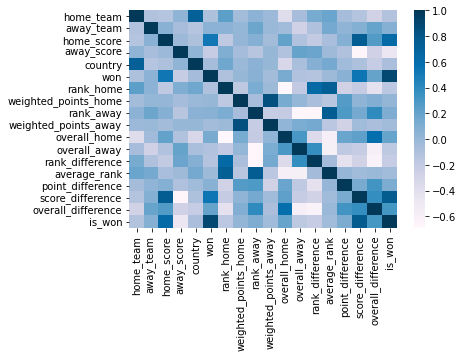

In [385]:
#Preprocessing - Feature Engineering - feature selection

# show a heatmap to see the correlation of each columns 
sns.heatmap(X.corr(),cmap = plt.cm.PuBu)
X.corr()

In [386]:
# select the 3 most correlated features
X = X[['rank_difference', 'point_difference', 'overall_difference']]

In [387]:
# set the target feature
# target is a column indicating whether or not to win.
y = results[['won']]

In [388]:
# split into training and test data
# mix order, adjust distribution of labels using stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, stratify=y)

In [389]:
# function that performs kfold cross-validation and returns accuracy
def kfoldAcc(k,X,y,model):
    kfold = KFold(n_splits=k)
    kf = cross_val_score(model, X, y.values.ravel(), cv=5)
    return kf

In [390]:
# Machine Learning Algorithm 1 - Decision Tree

# decisionTree for preliminary match, and visualize
# tree1
tree1 = DecisionTreeClassifier(max_depth=4, criterion="entropy")
tree1 = tree1.fit(X_train, y_train) # fit
dot_data2 = export_graphviz(tree1,
                                 out_file=None,
                                 feature_names=['rank_difference', 'point_difference', 'overall_difference'
                                                ],  # feature
                                 class_names=['Lose', 'Draw', 'Won'],  # target
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

graph2 = graphviz.Source(dot_data2)
graph = pydotplus.graph_from_dot_data(dot_data2)
graph.write_jpeg('decisiontree1.jpeg')

#confusion matrix for decision tree1
tree_1= tree1.predict(X_test)
print(confusion_matrix(y_test, tree_1))
print("\n")
# classification report
print(classification_report(y_test, tree_1))
# accuracy of k flod cross validation
print("Kfold accuarcy = ", kfoldAcc(5,X,y,tree1))

[[  1  39  56]
 [  1  58  44]
 [  4  36 128]]


              precision    recall  f1-score   support

        Draw       0.17      0.01      0.02        96
        Lost       0.44      0.56      0.49       103
         Win       0.56      0.76      0.65       168

    accuracy                           0.51       367
   macro avg       0.39      0.45      0.39       367
weighted avg       0.42      0.51      0.44       367

Kfold accuarcy =  [0.47066849 0.47748977 0.5        0.51775956 0.47404372]


In [391]:
# tournaments decision tree
y_2 = results[['is_won']] # target
X_2 = X[['rank_difference', 'point_difference', 'overall_difference']] # features
# train_test split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_2, y_2, test_size=0.1, shuffle=True, stratify=y)
# tree 2
tree2 = DecisionTreeClassifier(max_depth=4, criterion="entropy")
tree2 = tree2.fit(X_train_1, y_train_1)
dot_data3 = export_graphviz(tree2,
                                 out_file=None,
                                 feature_names=['rank_difference', 'point_difference', 'overall_difference',
                                                ],  # feature
                                 class_names=['Lose', 'Won'],  # target
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)
graph2 = graphviz.Source(dot_data3)
graph = pydotplus.graph_from_dot_data(dot_data3)
graph.write_jpeg('decisiontree2.jpeg')

True

In [392]:
# function that return the most optimal parameters with using GridSearchCV
def ensemble(params, clf):
    clf.fit(X_train, y_train)
    predict1 = clf.predict(X_test)
    grid_cv_1 = GridSearchCV(clf, param_grid=params, scoring="accuracy", n_jobs=-1, verbose=1)
    grid_cv_1.fit(X_train, y_train.values.ravel())
    return grid_cv_1

In [393]:
# Machine Learning Algorithm 2 - RandomForest

# Ensemble Learning (bagging and boosting)
# bagging (random forest)
# using gridSearch to search best parameters
params = {'n_estimators': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
          'max_depth': [3,4,5,6]
          }
clf = RandomForestClassifier(random_state=0)
grid_cv_1 = ensemble(params, clf)
print('optimum hyper parameter(bagging): ', grid_cv_1.best_params_)
print('optimum predict accuracy(bagging):', kfoldAcc(5,X,y, grid_cv_1))

Fitting 5 folds for each of 44 candidates, totalling 220 fits
optimum hyper parameter(bagging):  {'max_depth': 6, 'n_estimators': 28}
Fitting 5 folds for each of 44 candidates, totalling 220 fits
Fitting 5 folds for each of 44 candidates, totalling 220 fits
Fitting 5 folds for each of 44 candidates, totalling 220 fits
Fitting 5 folds for each of 44 candidates, totalling 220 fits
Fitting 5 folds for each of 44 candidates, totalling 220 fits
optimum predict accuracy(bagging): [0.51296044 0.48294679 0.49590164 0.5204918  0.46721311]


In [394]:
# predict 2022 world cup winner using decision tree
# let's define the rankings at the time of the World Cup
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) &
                                  rankings['country_full'].isin(world_cup.index.unique())]

# Overall by country

world_cup_rankings["overall"] = [84.733333, 84.133333, 85.622222, 76.733333, 72.666667, 69.377778, 81.044444, 79.355556,
                                 76.666667, 85.511111, 86.555556, 85.177778, 76.688889, 71.638889, 76.022222, 79.644444,
                                 79.155556, 83.733333, 73.666667, 79.355556, 84.577778, 69.977778,
                                 69.977778, 79.844444, 80.888889, 75.466667, 85.266667, 78.622222, 71.888889, 75.644444,
                                 81.844444, 74.977778]

# world_cup_rankings = world_cup_rankings.fillna(9)
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

from itertools import combinations

# Group qualifying round * 3
opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

# point
world_cup['points'] = 0

##Group qualifying round
for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = X[['rank_difference', 'point_difference', 'overall_difference']]
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        home_overall = world_cup_rankings.loc[home, 'overall']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        opp_overall = world_cup_rankings.loc[away, 'overall']

        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row['overall_difference'] = home_overall - opp_overall

        # Predict with Decision Tree 1 (for Group qualifying round)
        Y_predicted = tree1.predict(row)
        points = 0
        if Y_predicted[0] == 'Win':
            print(home, " win")
            points = 3
            world_cup.loc[home, 'points'] += 3
        elif Y_predicted[0] == 'Lose':
            print(away, "win")
            world_cup.loc[away, 'points'] += 3
        else:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

# Round of 16 matches
# [A_1th, B_2nd,C_1th, D_2nd,E_1th, F_2nd,G_1th, H_2nd,A_2nd, B_1th,C_2nd, D_1th,E_2nd, F_1th,G_2nd, H_1th ]
pairing = [0, 3, 4, 7, 8, 11, 12, 15, 1, 2, 5, 6, 9, 10, 13, 14]

world_cup = world_cup.sort_values(by=['Group', 'points'], ascending=False).reset_index()
# select the top 2
next_round_wc = world_cup.groupby('Group').nth([0, 1])
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')
print(next_round_wc)

# tournament
finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i * 2]
        away = next_round_wc.index[i * 2 + 1]
        print("{} vs. {}: ".format(home, away), end='')

        row = X[['rank_difference', 'point_difference', 'overall_difference']]
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        home_overall = world_cup_rankings.loc[home, 'overall']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        opp_overall = world_cup_rankings.loc[away, 'overall']

        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row['overall_difference'] = home_overall - opp_overall

        # Predict with Decision Tree 2 (for tournament)
        Y_predicted2 = tree2.predict(row)
        if Y_predicted2[0] == True:
            print(home, "win")
            winners.append(home)
        elif Y_predicted2[0] == False:
            winners.append(away)
            print(away, "win")
    #The winning team
    next_round_wc = next_round_wc.loc[winners]
    print("\n")


___Starting group D:___
France vs. Peru: France  win
France vs. Denmark: France  win
France vs. Tunisia: France  win
Peru vs. Denmark: Draw
Peru vs. Tunisia: Peru  win
Denmark vs. Tunisia: Denmark  win
___Starting group A:___
Qatar vs. Ecuador: Draw
Qatar vs. Senegal: Draw
Qatar vs. Netherlands: Draw
Ecuador vs. Senegal: Draw
Ecuador vs. Netherlands: Draw
Senegal vs. Netherlands: Draw
___Starting group H:___
Portugal vs. Ghana: Portugal  win
Portugal vs. Uruguay: Portugal  win
Portugal vs. South Korea: Portugal  win
Ghana vs. Uruguay: Draw
Ghana vs. South Korea: Ghana  win
Uruguay vs. South Korea: Uruguay  win
___Starting group F:___
Belgium vs. Canada: Belgium  win
Belgium vs. Morocco: Belgium  win
Belgium vs. Croatia: Belgium  win
Canada vs. Morocco: Draw
Canada vs. Croatia: Draw
Morocco vs. Croatia: Draw
___Starting group E:___
Spain vs. Costa Rica: Spain  win
Spain vs. Germany: Spain  win
Spain vs. Japan: Spain  win
Costa Rica vs. Germany: Draw
Costa Rica vs. Japan: Draw
Germany vs

In [395]:
# predict 2022 world cup winner using MultiOutputRegressor(RandomForestClassifier())
# make a new dataset with required features to train the machine learning model
# Year,Country,Team_1,team_2, team_1_rank, team_2_rank, team_1_overall, team_2_overall,team_1_score, team_2_score

New_Dataset_part_1 = pd.DataFrame(list(zip(years,main.values[:,7],main.values[:,1],main.values[:,2], main.values[:,11], main.values[:,16], 
                                         main.values[:,21], main.values[:,23], main.values[:,3],main.values[:,4])),
                                columns=['year','Country','team_1','team_2','team_1_rank', 'team_2_rank', 'team_1_overall', 'team_2_overall','team_1_score','team_2_score'])

# Make a new dataset by changing the team_1 and team_2 and their respective scores
New_Dataset_part_2 = pd.DataFrame(list(zip(years,main.values[:,7],main.values[:,2],main.values[:,1], main.values[:,16], main.values[:,11], 
                                         main.values[:,23], main.values[:,21],main.values[:,4],main.values[:,3])),
                                columns=['year','Country','team_1','team_2', 'team_1_rank', 'team_2_rank', 'team_1_overall', 'team_2_overall','team_1_score','team_2_score'])

New_Dataset = pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)
New_Dataset = New_Dataset.sample(frac=1).reset_index(drop=True) # Shaffle the dataset
New_Dataset.head()

,year,Country,team_1,team_2,team_1_rank,team_2_rank,team_1_overall,team_2_overall,team_1_score,team_2_score
0,1955,Brazil,Brazil,Uruguay,1.0,22.0,85.622222,81.844444,2,0
1,2001,Zimbabwe,Tanzania,Zimbabwe,130.0,101.0,0.000000,0.000000,0,3
2,1993,Tunisia,Tunisia,Algeria,45.0,63.0,71.888889,0.000000,0,1
3,1928,Northern Ireland,Austria,Northern Ireland,31.0,32.0,0.000000,0.000000,1,0
4,1946,Trinidad and Tobago,Trinidad and Tobago,Finland,78.0,87.0,0.000000,0.000000,2,0


In [396]:
# Definine the features and labels
Y= New_Dataset.iloc[:,8:10] # training targets (team_1_score,team_2_score, team_1_rank, team_2_rank, team_1_overall, team_2_overall)
categorized_data=New_Dataset.iloc[:,2:8].copy() # traing features

# label encoding instance
label_encoder = LabelEncoder()

# creating a list containg all the names of the countries
teams_1=New_Dataset.team_1.unique()
contries=New_Dataset.Country.unique()
all_countries=np.unique(np.concatenate((teams_1,contries), axis=0))
len(all_countries)

248

In [397]:
# labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))
label_encoder.fit(all_countries)

# list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])

# convert these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")

In [398]:
# Machine Learning Algorithm 3 - RandomForest

# make the model

# features
X = categorized_data

# MultiOutputRegressor
# multi target is predicted by approaching each one as a single target
# parameters: estimator
# need to predict scores for both countries

# RandomForestClassifier
# randomly learns a number of decision trees configured during the training and uses them for classification or regression results
model = MultiOutputRegressor(RandomForestClassifier())
model.fit(X,Y)

# making the predictions
prd=model.predict(X)

In [399]:
# create the confusion matrix for each predictions
score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

cm1=confusion_matrix(list(Y.iloc[:,0]),score_team_1)
cm2=confusion_matrix(list(Y.iloc[:,1]),score_team_2)

Text(105.0, 0.5, 'Predicted')

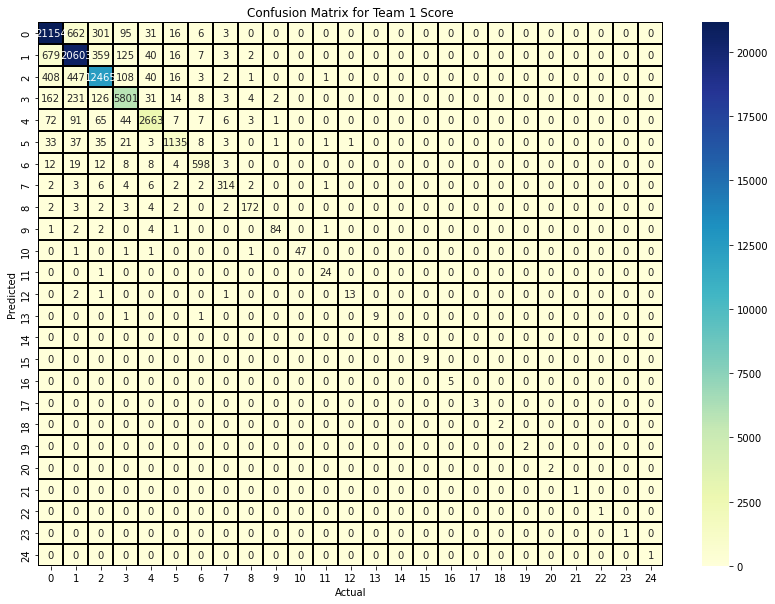

In [400]:
# plotting the confussion matrix for score of team 01
plt.figure(figsize=(14,10))
sns.heatmap(cm1, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for Team 1 Score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [418]:
# classification report to team 1 Score
# good Accuracy in predicting the team 1 Score
report_1=classification_report(Y.iloc[:,0],score_team_1)
print(report_1)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     22268
           1       0.93      0.94      0.94     21834
           2       0.93      0.92      0.93     13491
           3       0.93      0.91      0.92      6382
           4       0.94      0.90      0.92      2959
           5       0.94      0.89      0.91      1278
           6       0.93      0.90      0.92       664
           7       0.92      0.92      0.92       342
           8       0.93      0.91      0.92       190
           9       0.95      0.88      0.92        95
          10       1.00      0.92      0.96        51
          11       0.86      0.96      0.91        25
          12       0.93      0.76      0.84        17
          13       1.00      0.82      0.90        11
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         5
          17       1.00    

Text(105.0, 0.5, 'Predicted')

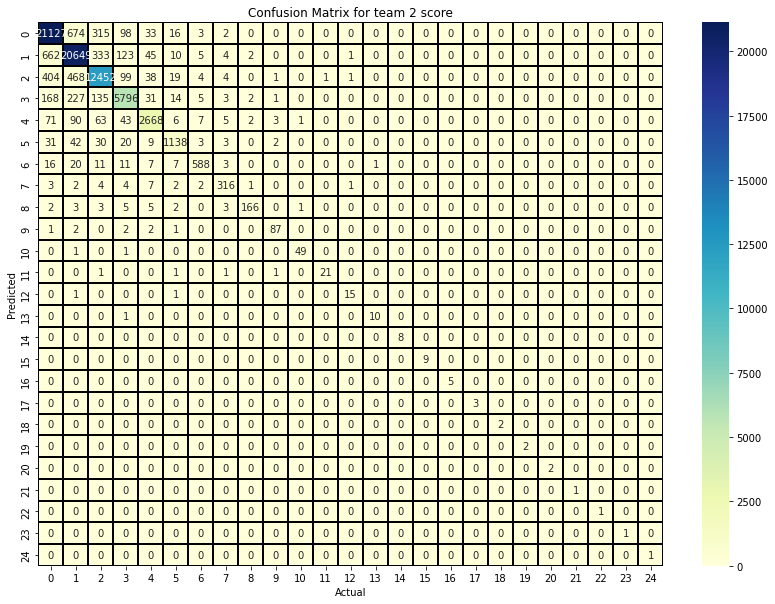

In [402]:
# plotting the confussion matrix for score of team 02
plt.figure(figsize=(14,10))
sns.heatmap(cm2, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for team 2 score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [403]:
# classification report to team 2 Score
# good accuracy in predicting the team 1 Score
report_2=classification_report(Y.iloc[:,1],score_team_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     22268
           1       0.93      0.95      0.94     21834
           2       0.93      0.92      0.93     13491
           3       0.93      0.91      0.92      6382
           4       0.94      0.90      0.92      2959
           5       0.94      0.89      0.91      1278
           6       0.95      0.89      0.92       664
           7       0.92      0.92      0.92       342
           8       0.96      0.87      0.91       190
           9       0.92      0.92      0.92        95
          10       0.96      0.96      0.96        51
          11       0.95      0.84      0.89        25
          12       0.83      0.88      0.86        17
          13       0.91      0.91      0.91        11
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         5
          17       1.00    

In [404]:
# fuction to select the winning team for the prediction array
def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

In [405]:
# 2022 FIFA Qatar World Cup Group Qualifying Countries and Groups

Group_A= ["Qatar","Ecuador","Senegal","Netherlands"]
Group_B= ["England","Iran","United States","Wales"]
Group_C= ["Argentina","Saudi Arabia","Mexico","Poland"]
Group_D= ["France","Denmark","Tunisia","Peru"]
Group_E= ["Spain", "Costa Rica","Germany","Japan"]
Group_F= ["Belgium", "Canada","Morocco","Croatia"]
Group_G= ["Brazil", "Serbia","Switzerland","Cameroon"]
Group_H= ["Portugal","Ghana","Uruguay","South Korea"]

Groups={"Group A":Group_A,"Group B":Group_B,"Group C":Group_C,"Group D":Group_D,
        "Group E":Group_E,"Group F":Group_F,"Group G":Group_G,"Group H":Group_H}

In [406]:
# group stage matches
# each team will play a league game to calculate points based on wins, draws, and losses

Group_standings={}
for grp_name in list(Groups.keys()):

    print(f"{grp_name} Matches")
    probable_countries = Groups[grp_name] # against country
    team_wins_dct = {}
    goal_scored_dct = {}
    goal_against_dct = {}
    win_dct = {} # win
    draw_dct = {} # draw
    lost_dct = {} # lost

    for i in range(len(probable_countries)):
        j=i+1
        team_1=probable_countries[i]
        team_1_num=label_encoder.transform([team_1])[0]
        team_wins=0

        # find the latest overalls and ranks of team1
        rank_1 = results[results['home_team'] == team_1]['rank_home']
        rank_1 = rank_1.iloc[-1].astype('int64')
        overall_1 = results[results['home_team'] == team_1]['overall_home']
        overall_1 = overall_1.iloc[-1].astype('int64')

        # team1 vs team 2
        # loop for team2
        while j<len((probable_countries)):

            team_2 = probable_countries[j] # against country
            team_2_num = label_encoder.transform([team_2])[0] # label encoding
            team_lst = [team_1,team_2]

            # find the latest overalls and ranks of team2
            rank_2 = results[results['home_team'] == team_2]['rank_home']
            rank_2 = rank_2.iloc[-1].astype('int64')
            overall_2 = results[results['home_team'] == team_2]['overall_home']
            overall_2 = overall_2.iloc[-1].astype('int64')

            # features
            Input_vector = np.array([[team_1_num,team_2_num, rank_1, rank_2, overall_1, overall_2]])
            res=model.predict(Input_vector) # predict

            win,prob_lst = select_winning_team(res)
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]

            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]

            try:
                print(f" {team_1} vs {team_2} \nResults of the Match {res[0]}\n{team_lst[win]} wins \n")
                if (win) == 0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0) + 2 # get the point of team1 and plus 2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)
                    
                    win_dct[team_1] = win_dct.get(team_1,0)+1 # team1 + 1 win point
                    win_dct[team_2] = win_dct.get(team_2,0)
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1 # team2 + 1 lost point
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win) == 1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2 # get the point of team2 and plus 2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)
                    
                    win_dct[team_2] = win_dct.get(team_2,0) + 1 # team2 + 1 win point
                    win_dct[team_1] = win_dct.get(team_1,0)
                    lost_dct[team_1] = lost_dct.get(team_1,0) + 1 # team1 + 1 lost point
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError: # Draw
                print(f"{team_1} vs {team_2} \nResults of the Match {res[0]}\nMatch Draw\n") 
                team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1 # get the point of team1 and plus 1
                team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1 # get the point of team2 and plus 1
                
                draw_dct[team_1] = draw_dct.get(team_1,0)+1 # team1 + 1 win point
                draw_dct[team_2] = draw_dct.get(team_2,0)+1 # team2 + 1 win point
                
                win_dct[team_1] = win_dct.get(team_1,0)
                lost_dct[team_1] = lost_dct.get(team_1,0)
                
                win_dct[team_2] = win_dct.get(team_2,0)
                lost_dct[team_2] = lost_dct.get(team_2,0)
                    
            j=j+1

    group_results = [win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name] = group_results

Group A Matches
 Qatar vs Ecuador 
Results of the Match [0 1]
Ecuador wins 

Qatar vs Senegal 
Results of the Match [0 0]
Match Draw

 Qatar vs Netherlands 
Results of the Match [1 2]
Netherlands wins 

Ecuador vs Senegal 
Results of the Match [0 0]
Match Draw

Ecuador vs Netherlands 
Results of the Match [1 1]
Match Draw

Senegal vs Netherlands 
Results of the Match [1 1]
Match Draw

Group B Matches
 England vs Iran 
Results of the Match [2 0]
England wins 

 England vs United States 
Results of the Match [1 0]
England wins 

 England vs Wales 
Results of the Match [1 0]
England wins 

Iran vs United States 
Results of the Match [1 1]
Match Draw

Iran vs Wales 
Results of the Match [0 0]
Match Draw

United States vs Wales 
Results of the Match [0 0]
Match Draw

Group C Matches
 Argentina vs Saudi Arabia 
Results of the Match [3 1]
Argentina wins 

Argentina vs Mexico 
Results of the Match [1 1]
Match Draw

 Argentina vs Poland 
Results of the Match [1 0]
Argentina wins 

 Saudi Arabia

In [407]:
# visualization of group qualification

for grp_name in list(Group_standings.keys()):

    team_wins_dct= dict(sorted(Group_standings[grp_name][3].items()))
    goal_scored_dct=dict(sorted(Group_standings[grp_name][4].items()))
    goal_against_dct=dict(sorted(Group_standings[grp_name][5].items()))
    
    win_dct=dict(sorted(Group_standings[grp_name][0].items()))
    draw_dct=dict(sorted(Group_standings[grp_name][1].items()))
    lost_dct=dict(sorted(Group_standings[grp_name][2].items()))
    
    lst_teams=list(team_wins_dct.keys())
    
    win_lst=list(win_dct.values())
    draw_lst=list(draw_dct.values())
    lost_lst=list(lost_dct.values())
    
    lst_win_count=list(team_wins_dct.values())
    goal_scored=list(goal_scored_dct.values())
    goal_against=list(goal_against_dct.values())
    goal_differance=[goal_scored[i]-goal_against[i] for i in range (len(goal_scored))]
    ranking_table=pd.DataFrame(list(zip(lst_teams,win_lst,draw_lst,lost_lst,goal_scored,goal_against,goal_differance,lst_win_count)),
                               columns=["Team","Wins","Draw","Lost","Goal Scored","Goal Against","Goal Differance","Points"])
    ranking_table=ranking_table.sort_values("Points",ascending=False).reset_index(drop=True)
    ranking_table.index = ranking_table.index + 1
    print(f"\n\n{grp_name} Final Rankings")
    print(ranking_table.to_markdown())



Group A Final Rankings
|    | Team        |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Ecuador     |      1 |      2 |      0 |             2 |              1 |                 1 |        4 |
|  2 | Netherlands |      1 |      2 |      0 |             4 |              3 |                 1 |        4 |
|  3 | Senegal     |      0 |      3 |      0 |             1 |              1 |                 0 |        3 |
|  4 | Qatar       |      0 |      1 |      2 |             1 |              3 |                -2 |        1 |


Group B Final Rankings
|    | Team          |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:--------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | England       |      3 |      0 |      0 | 

In [408]:
# Round of 16 section 1 and 2
# Same structure as group stage

# Round of 16 section 1

qualified_teams_1=[]
standings=list(Group_standings.keys())
i=0

print(f"--- Round of 16 ---\n")

while i < (len(standings)):

    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[0][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[1][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]

    rank_1 = results[results['home_team'] == team_1]['rank_home']
    rank_1 = rank_1.iloc[-1].astype('int64')
    rank_2 = results[results['home_team'] == team_2]['rank_home']
    rank_2 = rank_2.iloc[-1].astype('int64')

    overall_1 = results[results['home_team'] == team_1]['overall_home']
    overall_1 = overall_1.iloc[-1].astype('int64')
    overall_2 = results[results['home_team'] == team_2]['overall_home']
    overall_2 = overall_2.iloc[-1].astype('int64')
    
    Input_vector=np.array([[team_1_num,team_2_num, rank_1, rank_2, overall_1, overall_2]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n{team_lst[win]} wins ")
            print(f"{team_lst[win]} into the Quater-Finals\n")
            qualified_teams_1.append(team_lst[win])

    except IndexError:
            print(f"{team_1} vs {team_2} \nMatch Draw") 
            winning_team=random.choice(team_lst)
            print(f"{winning_team} wins at Penaly Shoot-Out")
            print(f"{winning_team} into the Quater-Finals \n")
            qualified_teams_1.append(winning_team)

    i=i+2
    

# Round of 16 section 2

qualified_teams_2=[]
standings=list(Group_standings.keys())
i=0

while i < (len(standings)):

    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[1][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[0][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    rank_1 = results[results['home_team'] == team_1]['rank_home']
    rank_1 = rank_1.iloc[-1].astype('int64')
    rank_2 = results[results['home_team'] == team_2]['rank_home']
    rank_2 = rank_2.iloc[-1].astype('int64')

    overall_1 = results[results['home_team'] == team_1]['overall_home']
    overall_1 = overall_1.iloc[-1].astype('int64')
    overall_2 = results[results['home_team'] == team_2]['overall_home']
    overall_2 = overall_2.iloc[-1].astype('int64')
    
    Input_vector=np.array([[team_1_num,team_2_num, rank_1, rank_2, overall_1, overall_2]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n{team_lst[win]} wins ")
            print(f"{team_lst[win]} into the Quater-Finals \n")
            qualified_teams_2.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \nMatch Draw") 
            winning_team=random.choice(team_lst)
            print(f"{winning_team} wins at Penaly Shoot-Out")
            print(f" {winning_team} into the Quater-Finals \n")
            qualified_teams_2.append(winning_team)

    i=i+2

--- Round of 16 ---

Ecuador vs Iran 
Ecuador wins 
Ecuador into the Quater-Finals

Argentina vs Denmark 
Argentina wins 
Argentina into the Quater-Finals

Spain vs Croatia 
Spain wins 
Spain into the Quater-Finals

Switzerland vs Uruguay 
Match Draw
Switzerland wins at Penaly Shoot-Out
Switzerland into the Quater-Finals 

Netherlands vs England 
Netherlands wins 
Netherlands into the Quater-Finals 

Poland vs France 
France wins 
France into the Quater-Finals 

Germany vs Belgium 
Germany wins 
Germany into the Quater-Finals 

Serbia vs Portugal 
Portugal wins 
Portugal into the Quater-Finals 



In [409]:
print(f"Teams selected to the Quater Finals - {qualified_teams_1+qualified_teams_2}")

Teams selected to the Quater Finals - ['Ecuador', 'Argentina', 'Spain', 'Switzerland', 'Netherlands', 'France', 'Germany', 'Portugal']


In [410]:
# Quarter Finals

Semifinal_teams=[]
i=0
print(f"--- Quater Final Matches ---\n")

while i < (len(qualified_teams_1))-1:

    team_1= qualified_teams_1[i]
    team_2= qualified_teams_1[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    rank_1 = results[results['home_team'] == team_1]['rank_home']
    rank_1 = rank_1.iloc[-1].astype('int64')
    rank_2 = results[results['home_team'] == team_2]['rank_home']
    rank_2 = rank_2.iloc[-1].astype('int64')

    overall_1 = results[results['home_team'] == team_1]['overall_home']
    overall_1 = overall_1.iloc[-1].astype('int64')
    overall_2 = results[results['home_team'] == team_2]['overall_home']
    overall_2 = overall_2.iloc[-1].astype('int64')
    
    Input_vector=np.array([[team_1_num,team_2_num, rank_1, rank_2, overall_1, overall_2]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n{team_lst[win]} wins")
            print(f"{team_lst[win]} into the Semi-Finals \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \nMatch Draw ")
            winning_team=random.choice(team_lst)
            print(f"{winning_team} wins at Penaly Shoot-Out")
            print(f"{winning_team} into the Semi-Finals\n")
            Semifinal_teams.append(winning_team)

    i=i+2
    
i=0

while i < (len(qualified_teams_2))-1:

    team_1= qualified_teams_2[i]
    team_2= qualified_teams_2[i+1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    rank_1 = results[results['home_team'] == team_1]['rank_home']
    rank_1 = rank_1.iloc[-1].astype('int64')
    rank_2 = results[results['home_team'] == team_2]['rank_home']
    rank_2 = rank_2.iloc[-1].astype('int64')

    overall_1 = results[results['home_team'] == team_1]['overall_home']
    overall_1 = overall_1.iloc[-1].astype('int64')
    overall_2 = results[results['home_team'] == team_2]['overall_home']
    overall_2 = overall_2.iloc[-1].astype('int64')
    
    Input_vector=np.array([[team_1_num,team_2_num, rank_1, rank_2, overall_1, overall_2]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n{team_lst[win]} wins")
            print(f"{team_lst[win]} into the Semi-Finals\n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \nMatch Draw") 
            winning_team=random.choice(team_lst)
            print(f"{winning_team} wins at Penaly Shoot-Out")
            print(f"{winning_team} into the Semi-Finals\n")
            Semifinal_teams.append(winning_team)
            
    i=i+2

--- Quater Final Matches ---

Ecuador vs Argentina 
Argentina wins
Argentina into the Semi-Finals 

Spain vs Switzerland 
Spain wins
Spain into the Semi-Finals 

Netherlands vs France 
Match Draw
France wins at Penaly Shoot-Out
France into the Semi-Finals

Germany vs Portugal 
Germany wins
Germany into the Semi-Finals



In [411]:
print(f"Teams selected to the Semi-Finals - {Semifinal_teams}")

Teams selected to the Semi-Finals - ['Argentina', 'Spain', 'France', 'Germany']


In [412]:
#Semi Finals

final_teams=[]
third_place_match_teams=[]
i=0

print(f"--- Semi Final Matches ---\n")

while i < (len(Semifinal_teams))-1:

    team_1= Semifinal_teams[i]
    team_2= Semifinal_teams[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    rank_1 = results[results['home_team'] == team_1]['rank_home']
    rank_1 = rank_1.iloc[-1].astype('int64')
    rank_2 = results[results['home_team'] == team_2]['rank_home']
    rank_2 = rank_2.iloc[-1].astype('int64')

    overall_1 = results[results['home_team'] == team_1]['overall_home']
    overall_1 = overall_1.iloc[-1].astype('int64')
    overall_2 = results[results['home_team'] == team_2]['overall_home']
    overall_2 = overall_2.iloc[-1].astype('int64')
    
    Input_vector=np.array([[team_1_num,team_2_num, rank_1, rank_2, overall_1, overall_2]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n{team_lst[win]} wins ")
            print(f"{team_lst[win]} into the FIFA-Finals \n")
            final_teams.append(team_lst[win])
            third_place_match_teams.append(team_lst[(win+1)%2])

            
    except IndexError:
            print(f"{team_1} vs {team_2} \nMatch Draw") 
            winning_team=random.choice(team_lst)
            print(f"{winning_team} wins at Penaly Shoot-Out")
            print(f"{winning_team} into the FIFA-Finals\n")
            final_teams.append(winning_team)
            team_lst.remove(winning_team)
            third_place_match_teams.append(team_lst[0])

    i=i+2

--- Semi Final Matches ---

Argentina vs Spain 
Match Draw
Argentina wins at Penaly Shoot-Out
Argentina into the FIFA-Finals

France vs Germany 
France wins 
France into the FIFA-Finals 



In [413]:
print(f"Teams selected to the Finals - {final_teams}")
print(f"Teams selected to the Third Place match - {third_place_match_teams}")

Teams selected to the Finals - ['Argentina', 'France']
Teams selected to the Third Place match - ['Spain', 'Germany']


In [414]:
# Finals and Third Place match

print(f"--- Final Match ---\n")
team_1= final_teams[1]
team_2= final_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
rank_1 = results[results['home_team'] == team_1]['rank_home']
rank_1 = rank_1.iloc[-1].astype('int64')
rank_2 = results[results['home_team'] == team_2]['rank_home']
rank_2 = rank_2.iloc[-1].astype('int64')

overall_1 = results[results['home_team'] == team_1]['overall_home']
overall_1 = overall_1.iloc[-1].astype('int64')
overall_2 = results[results['home_team'] == team_2]['overall_home']
overall_2 = overall_2.iloc[-1].astype('int64')
    
Input_vector=np.array([[team_1_num,team_2_num, rank_1, rank_2, overall_1, overall_2]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n{team_lst[win]} are the Winners\n\n")
    winner=team_lst[win]
    place_2=team_lst[(win+1)%2]
            
except IndexError:
    print(f"{team_1} vs {team_2} \nMatch Draw") 
    winning_team=random.choice(team_lst)
    print(f"{winning_team} wins at Penaly Shoot-Out")
    print(f"{winning_team} are the Winners\n\n")
    winner=winning_team
    
    team_lst.remove(winning_team)
    place_2=team_lst[0]

print(f"Third Place match\n")
team_1= third_place_match_teams[1]
team_2= third_place_match_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
rank_1 = results[results['home_team'] == team_1]['rank_home']
rank_1 = rank_1.iloc[-1].astype('int64')
rank_2 = results[results['home_team'] == team_2]['rank_home']
rank_2 = rank_2.iloc[-1].astype('int64')

overall_1 = results[results['home_team'] == team_1]['overall_home']
overall_1 = overall_1.iloc[-1].astype('int64')
overall_2 = results[results['home_team'] == team_2]['overall_home']
overall_2 = overall_2.iloc[-1].astype('int64')
    
Input_vector=np.array([[team_1_num,team_2_num, rank_1, rank_2, overall_1, overall_2]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} Wins the 3rd Place \n")
    place_3=team_lst[win]
            
except IndexError:
    print(f"{team_1} vs {team_2} \nMatch Draw ") 
    winning_team=random.choice(team_lst)
    print(f"{winning_team} wins at Penaly Shoot-Out ")
    print(f"{winning_team} Wins the 3rd Place \n")
    place_3=winning_team
    

print(f"-------- 1st Place is {winner} ----------")
print(f"-------- 2nd Place is {place_2} ----------")
print(f"-------- 3rd Place is {place_3} ----------")

--- Final Match ---

France vs Argentina 
Argentina are the Winners


Third Place match

Germany vs Spain 
Match Draw 
Germany wins at Penaly Shoot-Out 
Germany Wins the 3rd Place 

-------- 1st Place is Argentina ----------
-------- 2nd Place is France ----------
-------- 3rd Place is Germany ----------


In [415]:
# Machine Learning Algorithm 4 - Linear Regression

# use linear regression to see how overall and rank differences affect score differences

X = results.copy()

x = X[['overall_difference', 'rank_difference']]
y = X['score_difference']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

# create an object of LinearRegression class
model = LinearRegression()

# fit the training data
model.fit(x_train, y_train)

# print the score of linear regression
score = model.score(x_train, y_train)
score

0.1353785285494158

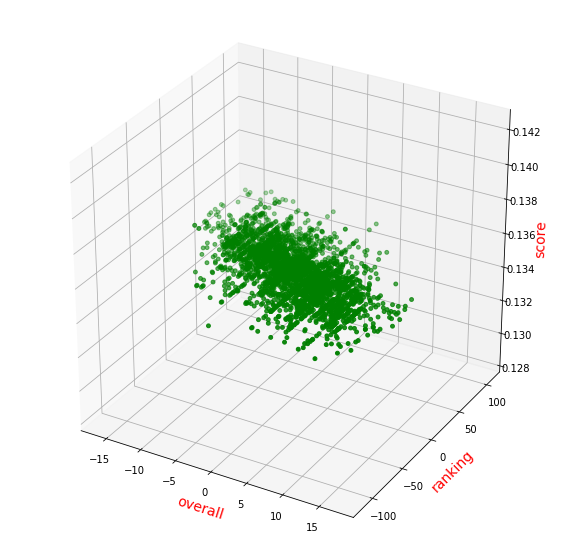

In [416]:
#linear regression plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("overall", size = 14, color = "r")
ax.set_ylabel("ranking", size = 14, color = "r")
ax.set_zlabel("score", size = 14, color = "r")
ax.scatter(X['overall_difference'], X['rank_difference'], score, c='green',marker='o', s=15, cmap='Greens')

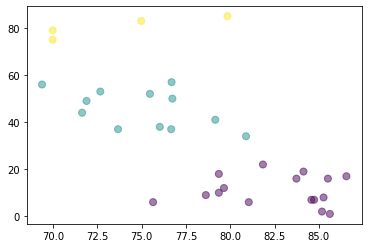

In [417]:
# Machine Learning Algorithm 5 - Clustering

# check the power of countries by creating clusters based on ranks and overalls by country

X = results.copy()

X = X[['home_team', 'rank_home', 'overall_home']] # features
X = X.drop_duplicates('home_team') # remove duplicate country names
X = X.drop('home_team', axis = 1)

model = KMeans(n_clusters=4)
k = 3 # k can be changed
model = KMeans(n_clusters=k)
model.fit(X) #fit

# show clusters with scatter plot
plt.scatter(X['overall_home'], X['rank_home'], c=model.labels_.astype(float), s=50, alpha=0.5)
plt.show()